# Amazon reviews sentiment analysis
###### Dataset from Kaggle.com

------


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [2]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

,product_title,average_rating,total_reviews,review_author,review_rating,review_date,review_text
0,Apple AirPods with Charging Case (Wired),4.8,26820,Austin McKinney,1,2-May-21,Defective since day 1. They literally freeze a...
1,Apple AirPods with Charging Case (Wired),4.8,26820,Verónica Saldaña,1,21-Apr-21,No se porque pero la gente dice que no me escu...
2,Apple AirPods with Charging Case (Wired),4.8,26820,Winston Anderson,4,1-May-21,Works great
3,Apple AirPods with Charging Case (Wired),4.8,26820,Jeremy Ma,5,25-May-21,The quality is very good and the price is very...
4,Apple AirPods with Charging Case (Wired),4.8,26820,Amazon Customer,5,19-Apr-21,Love them. Fit perfectly. No sweating
...,...,...,...,...,...,...,...
1175,Apple AirPods with Charging Case (Wired),4.8,26820,Sandra Rocha,5,28-May-21,👍
1176,Apple AirPods with Charging Case (Wired),4.8,26820,Anon,1,31-May-21,These were ordered October of 2020 for a Chris...
1177,Apple AirPods with Charging Case (Wired),4.8,26820,Shawn,1,25-May-21,I haven’t even had these a month and already t...
1178,Apple AirPods with Charging Case (Wired),4.8,26820,Alicia Baines,5,29-Apr-21,Perfect ! I I’ll never pay full price for thin...


In [3]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_title   1180 non-null   object 
 1   average_rating  1180 non-null   float64
 2   total_reviews   1180 non-null   int64  
 3   review_author   1180 non-null   object 
 4   review_rating   1180 non-null   int64  
 5   review_date     1180 non-null   object 
 6   review_text     1180 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 64.7+ KB


In [4]:
# View DataFrame Statistical Summary
reviews_df.describe()

,average_rating,total_reviews,review_rating
count,1.180000e+03,1180.0,1180.000000
mean,4.800000e+00,26820.0,4.100000
std,1.039609e-13,0.0,1.526748
min,4.800000e+00,26820.0,1.000000
25%,4.800000e+00,26820.0,4.000000
50%,4.800000e+00,26820.0,5.000000
75%,4.800000e+00,26820.0,5.000000
max,4.800000e+00,26820.0,5.000000


<AxesSubplot:xlabel='review_rating', ylabel='count'>

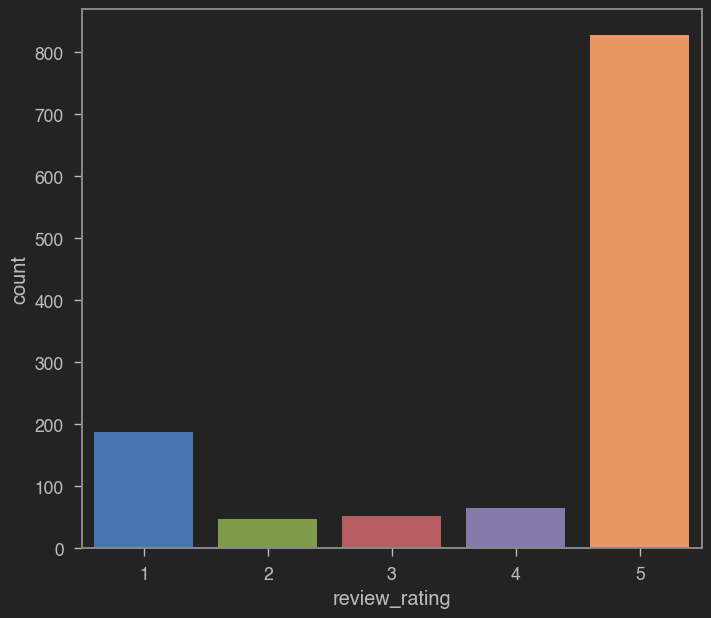

In [5]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['review_rating']) 

In [6]:
string = (reviews_df['review_text']).astype('string')
string

0       Defective since day 1. They literally freeze a...
1       No se porque pero la gente dice que no me escu...
2                                             Works great
3       The quality is very good and the price is very...
4                   Love them. Fit perfectly. No sweating
                              ...                        
1175                                                    👍
1176    These were ordered October of 2020 for a Chris...
1177    I haven’t even had these a month and already t...
1178    Perfect ! I I’ll never pay full price for thin...
1179    These AirPods came fast and were good quality....
Name: review_text, Length: 1180, dtype: string

In [7]:
#reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_title   1180 non-null   object 
 1   average_rating  1180 non-null   float64
 2   total_reviews   1180 non-null   int64  
 3   review_author   1180 non-null   object 
 4   review_rating   1180 non-null   int64  
 5   review_date     1180 non-null   object 
 6   review_text     1180 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 64.7+ KB


In [8]:
sentences_as_one_string =" ".join(string)
#str(sentences_as_one_string)
sentences_as_one_string

'Defective since day 1. They literally freeze apps up and make the app crash when there connected. Strongly believe I got a NON AUTHENTIC pair. Sad cause they were a gift and by the time I was told they were defective it was outside return window. No se porque pero la gente dice que no me escuchan no se si cabe la posibilidad de que estén defectuosos. Works great The quality is very good and the price is very low. My son likes it very much Love them. Fit perfectly. No sweating My wife really like it Ian gon lie it gotta lil black mark on it but I scratched it off. Other then tht the all good. I love the sound and battery life! Works well with the iPhone 12 Pro Max The right AirPods is not working properly. Not bad Bought these for my 3 kids for a 10hr drive to Florida(13,12,8) no complaints yet, the live the sound, and i love that I don\'t have to hear it! Definitely a great buy for the money and to keep my sanity! Perfect Everyone in the family had AirPods except my husband. He finall

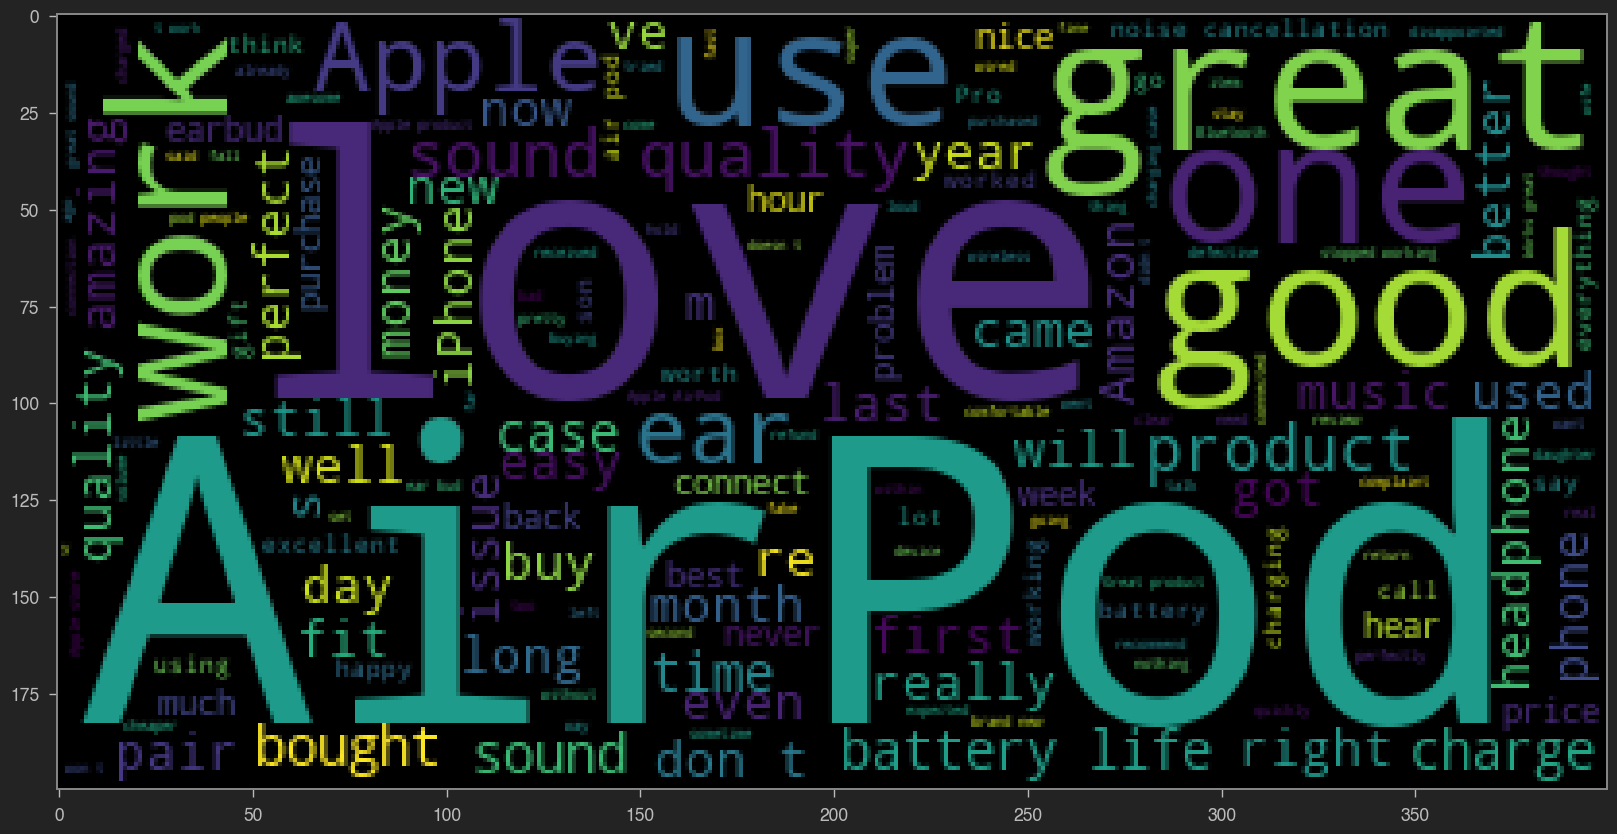

In [9]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [10]:
# Let's get the length of the review_text column
reviews_df['length'] = reviews_df['review_text'].str.len()
reviews_df.head()

,product_title,average_rating,total_reviews,review_author,review_rating,review_date,review_text,length
0,Apple AirPods with Charging Case (Wired),4.8,26820,Austin McKinney,1,2-May-21,Defective since day 1. They literally freeze a...,246
1,Apple AirPods with Charging Case (Wired),4.8,26820,Verónica Saldaña,1,21-Apr-21,No se porque pero la gente dice que no me escu...,105
2,Apple AirPods with Charging Case (Wired),4.8,26820,Winston Anderson,4,1-May-21,Works great,11
3,Apple AirPods with Charging Case (Wired),4.8,26820,Jeremy Ma,5,25-May-21,The quality is very good and the price is very...,77
4,Apple AirPods with Charging Case (Wired),4.8,26820,Amazon Customer,5,19-Apr-21,Love them. Fit perfectly. No sweating,37


<AxesSubplot:ylabel='Frequency'>

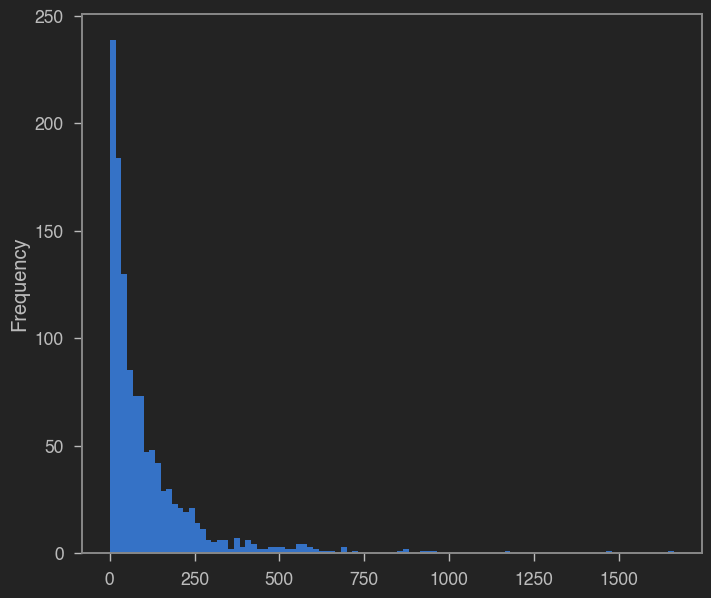

In [11]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist') 

In [12]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,average_rating,total_reviews,review_rating,length
count,1.180000e+03,1180.0,1180.000000,1180.000000
mean,4.800000e+00,26820.0,4.100000,108.069492
std,1.039609e-13,0.0,1.526748,148.661607
min,4.800000e+00,26820.0,1.000000,1.000000
25%,4.800000e+00,26820.0,4.000000,22.000000
50%,4.800000e+00,26820.0,5.000000,57.000000
75%,4.800000e+00,26820.0,5.000000,135.000000
max,4.800000e+00,26820.0,5.000000,1661.000000


In [13]:
#list = reviews_df['review_text'].tolist()
#list

In [14]:
# Obtain only the positive reviews
positive_highest = reviews_df[reviews_df['review_rating'] == 5]
positive_highest

,product_title,average_rating,total_reviews,review_author,review_rating,review_date,review_text,length
3,Apple AirPods with Charging Case (Wired),4.8,26820,Jeremy Ma,5,25-May-21,The quality is very good and the price is very...,77
4,Apple AirPods with Charging Case (Wired),4.8,26820,Amazon Customer,5,19-Apr-21,Love them. Fit perfectly. No sweating,37
5,Apple AirPods with Charging Case (Wired),4.8,26820,Amazon Customer,5,22-May-21,My wife really like it,22
6,Apple AirPods with Charging Case (Wired),4.8,26820,Imarian,5,28-May-21,Ian gon lie it gotta lil black mark on it but ...,94
7,Apple AirPods with Charging Case (Wired),4.8,26820,Larry C. Twichell Jr.,5,17-May-21,I love the sound and battery life! Works well ...,72
...,...,...,...,...,...,...,...,...
1173,Apple AirPods with Charging Case (Wired),4.8,26820,John Emil,5,25-May-21,Absolutely great,16
1174,Apple AirPods with Charging Case (Wired),4.8,26820,Carlos,5,17-Apr-21,Saved a lot on money on this purchase . My son...,134
1175,Apple AirPods with Charging Case (Wired),4.8,26820,Sandra Rocha,5,28-May-21,👍,1
1178,Apple AirPods with Charging Case (Wired),4.8,26820,Alicia Baines,5,29-Apr-21,Perfect ! I I’ll never pay full price for thin...,205


In [16]:
sentences = positive_highest['review_text'].tolist()
len(sentences)

828

In [17]:
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string

'The quality is very good and the price is very low. My son likes it very much Love them. Fit perfectly. No sweating My wife really like it Ian gon lie it gotta lil black mark on it but I scratched it off. Other then tht the all good. I love the sound and battery life! Works well with the iPhone 12 Pro Max The right AirPods is not working properly. Not bad Bought these for my 3 kids for a 10hr drive to Florida(13,12,8) no complaints yet, the live the sound, and i love that I don\'t have to hear it! Definitely a great buy for the money and to keep my sanity! Perfect Everyone in the family had AirPods except my husband. He finally decided he wanted AirPods, and he is very satisfied with them. I really love this product. The sound quality is amazing along with noise cancellation, and other features such as Siri and touch controls. AMAZING PRODUCT They are de second generation I’m so glad with product. To date it works perfectly fine These air pods are simply incredible!!! Not sure why I w

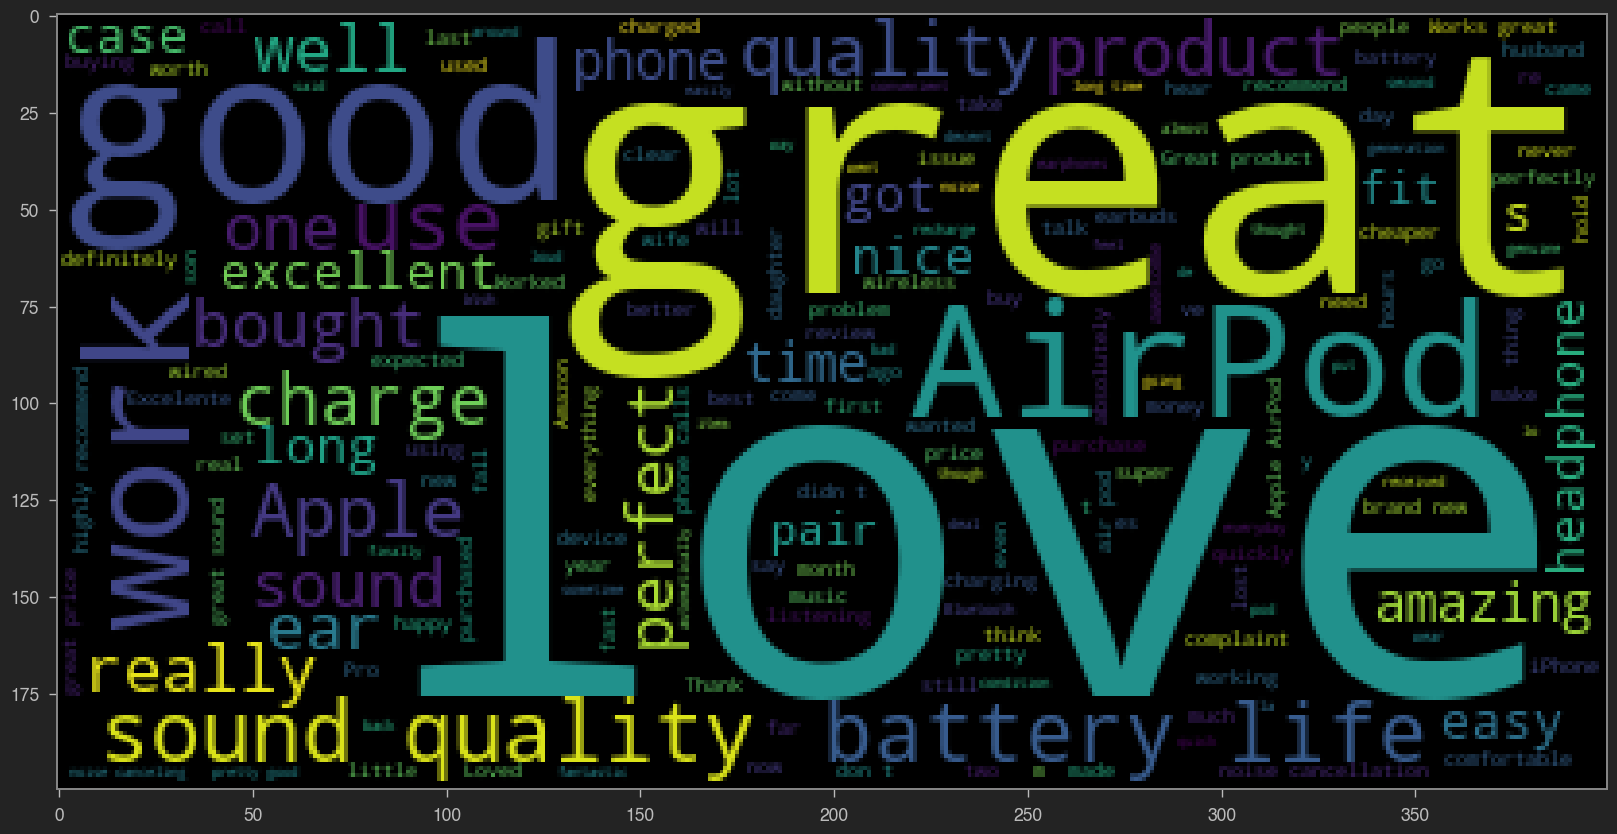

In [18]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [19]:
# Obtain the negative reviews only
negative_lowest = reviews_df[reviews_df['review_rating'] == 1]
negative_lowest

,product_title,average_rating,total_reviews,review_author,review_rating,review_date,review_text,length
0,Apple AirPods with Charging Case (Wired),4.8,26820,Austin McKinney,1,2-May-21,Defective since day 1. They literally freeze a...,246
1,Apple AirPods with Charging Case (Wired),4.8,26820,Verónica Saldaña,1,21-Apr-21,No se porque pero la gente dice que no me escu...,105
18,Apple AirPods with Charging Case (Wired),4.8,26820,Gina sexton,1,16-Apr-21,"If you like throwing money out the window, buy...",267
23,Apple AirPods with Charging Case (Wired),4.8,26820,KP3,1,26-Apr-21,"Very, very disappointed. I usually have no iss...",303
29,Apple AirPods with Charging Case (Wired),4.8,26820,Brianna Smith,1,4-May-21,One side did not work and will not charge,41
...,...,...,...,...,...,...,...,...
1160,Apple AirPods with Charging Case (Wired),4.8,26820,Heidi and Eddie,1,3-May-21,Product only worked on right side. Got technic...,162
1167,Apple AirPods with Charging Case (Wired),4.8,26820,dylan york,1,28-Apr-21,Item came broken,16
1168,Apple AirPods with Charging Case (Wired),4.8,26820,Mr_Marshall,1,1-May-21,"After a month of regular use, these AirPods wi...",603
1176,Apple AirPods with Charging Case (Wired),4.8,26820,Anon,1,31-May-21,These were ordered October of 2020 for a Chris...,392


In [20]:
# Convert to list format
sentences = negative_lowest['review_text'].tolist()
len(sentences)

188

In [22]:
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string

'Defective since day 1. They literally freeze apps up and make the app crash when there connected. Strongly believe I got a NON AUTHENTIC pair. Sad cause they were a gift and by the time I was told they were defective it was outside return window. No se porque pero la gente dice que no me escuchan no se si cabe la posibilidad de que estén defectuosos. If you like throwing money out the window, buy them. They are constantly falling out of your ear. Sorry, can’t work well if they don’t stay put. Waste of money.....literally. I just. Ought my second set last week and I already am down one because they fall CONSTANTLY Very, very disappointed. I usually have no issues with Amazon but I excitedly ripped open the Amazon box to quickly discover I received an empty box of AirPods. It was not plastic sealed and the headphones were missing. Very, very disappointed because I have been extremely excited to start using these. One side did not work and will not charge My purchase was Aug 2020. About 

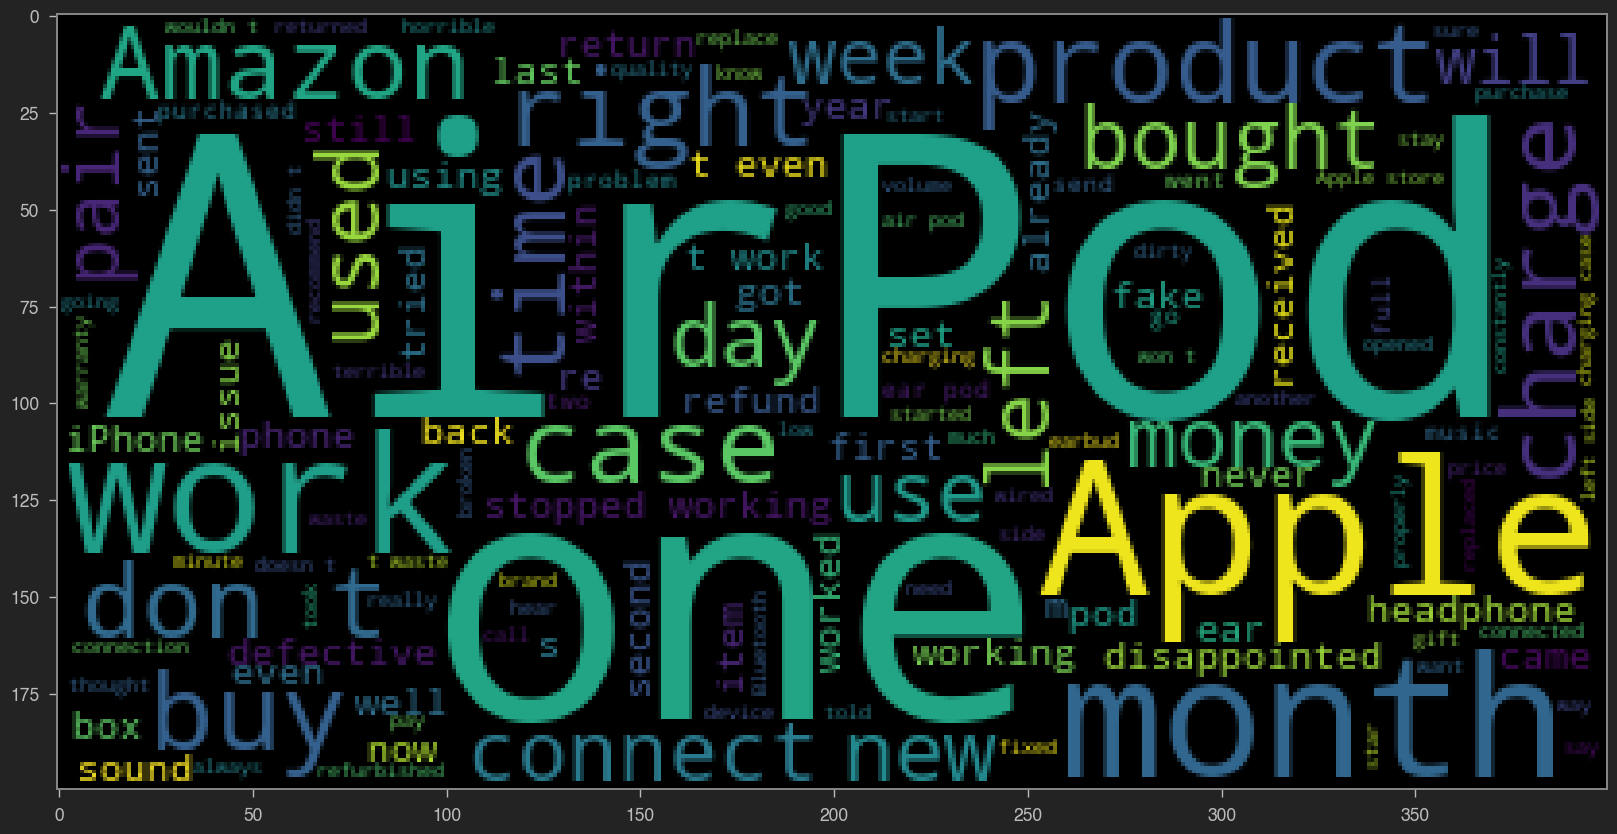

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
sentences_as_one_string =(" ".join(sentences_list)).astype('str')

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_list))